<a href="https://colab.research.google.com/github/kalyani179/Automatic-Notes-Generator/blob/main/Package_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing


## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('/content/Campus Placement Prediction - Form responses 1 (1).csv')
dataset.head()

,Timestamp,Email address,Stream,Gender,Age (in years),10th Result in % (% = GPA*10),12th Result ( in %),CGPA,Number of Backlogs,CodeChef Stars,CodeForces Title,Number of Coding Questions Solved [Hacker rank],Number of Coding Questions Solved [Leetcode],Number of Coding Questions Solved [GeeksForGeeks],How do you rate your proficiency in Aptitude,How do you rate your proficiency in Communication,Work Experience (in months) (including internships),Number of Certifications,Technologies/Skills,Current Package in LPA
0,15/05/2024 13:29:23,chimatavarunsai24@gmail.com,Computer Science and Engineering (CSE),Male,21,100.0,95.0,8.80,0,1,Newbie,1-50,more than 300,50-150,Medium,Medium,2.0,3,"C, C++, Java, Python, Machine Learning, Php, SQL",4.0
1,15/05/2024 15:33:08,premroym2002@gmail.com,Electronics and Communication Engineering (ECE),Male,22,85.8,97.5,8.95,0,1,Newbie,0,0,0,Medium,Medium,3.0,2,"C, Java, Python, SQL, Javascript",0.0
2,15/05/2024 15:38:39,hritiknagar2001@gmail.com,Information Technology (IT),Male,22,70.0,73.0,7.60,0,3,Newbie,1-50,150-300,1-50,Medium,Expert,3.0,3,"C, C++, Java, SQL, React, Javascript",6.0
3,15/05/2024 16:04:02,jayanthkumarcheepurupalli@gmail.com,Computer Science and Engineering (CSE),Male,21,93.0,92.0,9.20,0,1,Newbie,1-50,50-150,50-150,Medium,Expert,24.0,25,"C, C++, Java, Python, Machine Learning, Php, S...",2.4
4,15/05/2024 17:15:08,harikpriyatirumalaraju@gmail.com,Computer Science and Engineering (CSE),Female,22,100.0,97.0,8.80,0,1,Newbie,1-50,1-50,50-150,Medium,Medium,18.0,0,"C, Java, Python, Machine Learning, Nodejs",11.0


## Data cleaning

In [ ]:
dataset.rename(columns={'Age (in years)':'Age','10th Result in % (% = GPA*10)':"Tenth Grade","12th Result ( in %)":"Inter Grade","CGPA":"Btech CGPA","Number of Backlogs":"Backlogs","CodeChef Stars":"CodeChef Stars","CodeForces Title" : "CodeForces Title","Number of Coding Questions Solved [Hacker rank]":"Hacker rank","Number of Coding Questions Solved [Leetcode]":"leetcode","Number of Coding Questions Solved [GeeksForGeeks]" :"GFG","How do you rate your proficiency in Aptitude" : "Aptitude Proficiency","How do you rate your proficiency in Communication" : "Communication Proficiency","Work Experience (in months) (including internships)":"Internship months","Number of Certifications":"Number of Certifications","Technologies/Skills":"Skills","Current Package in LPA":"Package"},inplace=True)

In [ ]:
dataset.loc[dataset["Inter Grade"] > 100, "Inter Grade"] = dataset["Inter Grade"] / 100
dataset.describe()

,Age,Tenth Grade,Inter Grade,Btech CGPA,Backlogs,CodeChef Stars,Internship months,Number of Certifications,Package
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,21.567568,94.518919,89.857027,8.342973,0.135135,0.972973,7.743243,6.351351,7.359459
std,1.236944,7.399619,15.247794,0.617616,0.585100,1.384166,9.549303,7.850040,7.234493
min,20.000000,70.000000,9.710000,6.980000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,93.000000,91.000000,7.960000,0.000000,0.000000,1.500000,2.000000,3.500000
50%,21.000000,98.000000,94.000000,8.400000,0.000000,0.000000,4.000000,4.000000,5.000000
75%,22.000000,100.000000,97.000000,8.800000,0.000000,2.000000,12.000000,9.000000,10.000000
max,26.000000,100.000000,99.400000,9.400000,3.000000,5.000000,40.000000,40.000000,40.000000


In [ ]:
all_skills = dataset['Skills'].explode()
skill_counts = all_skills.value_counts()
print(all_skills)

0      C, C++, Java, Python, Machine Learning, Php, SQL
1                      C, Java, Python, SQL, Javascript
2                  C, C++, Java, SQL, React, Javascript
3     C, C++, Java, Python, Machine Learning, Php, S...
4             C, Java, Python, Machine Learning, Nodejs
5     C, Java, Python, Flask, Machine Learning, Reac...
6                                          Java, Python
7     C, C++, Java, Python, Flask, Machine Learning,...
8     C, C++, Java, Python, Machine Learning, SQL, R...
9     C, C++, Java, Python, Machine Learning, SQL, C...
10                    C, Java, Python, Machine Learning
11    Python, Machine Learning, SQL, DevOps, Cloud C...
12    C, C++, Java, Python, Machine Learning, Php, S...
13                    Java, SQL, React, Nodejs, Express
14    C, Java, Python, SQL, Cloud Computing, Javascript
15            C, C++, Python, MongoDB, Django, Android 
16                               Python, Cyber Security
17    C, C++, Python, Flask, SQL, MongoDB, React

In [ ]:
X = dataset.iloc[:, 2:-1]
y = dataset.iloc[:, -1]

In [ ]:
print(X)

                                             Stream  Gender  Age  Tenth Grade  \
0            Computer Science and Engineering (CSE)    Male   21        100.0   
1   Electronics and Communication Engineering (ECE)    Male   22         85.8   
2                       Information Technology (IT)    Male   22         70.0   
3            Computer Science and Engineering (CSE)    Male   21         93.0   
4            Computer Science and Engineering (CSE)  Female   22        100.0   
5            Computer Science and Engineering (CSE)  Female   23        100.0   
6            Computer Science and Engineering (CSE)    Male   23         90.0   
7            Computer Science and Engineering (CSE)  Female   20        100.0   
8                       Information Technology (IT)    Male   21         93.0   
9                       Information Technology (IT)    Male   20         77.0   
10                      Information Technology (IT)  Female   22         98.0   
11           Computer Scienc

## Encoding the Categorical Independent Variables

### One Hot Encoding

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[0.0 1.0 0.0 0.0 0.0 0.0 1.0 21 100.0 95.0 8.8 0 1 'Newbie' '1-50'
  'more than 300' '50-150' 'Medium' 'Medium' 2.0 3
  'C, C++, Java, Python, Machine Learning, Php, SQL']
 [0.0 0.0 0.0 1.0 0.0 0.0 1.0 22 85.8 97.5 8.95 0 1 'Newbie' '0' '0' '0'
  'Medium' 'Medium' 3.0 2 'C, Java, Python, SQL, Javascript']
 [0.0 0.0 0.0 0.0 1.0 0.0 1.0 22 70.0 73.0 7.6 0 3 'Newbie' '1-50'
  '150-300' '1-50' 'Medium' 'Expert' 3.0 3
  'C, C++, Java, SQL, React, Javascript']
 [0.0 1.0 0.0 0.0 0.0 0.0 1.0 21 93.0 92.0 9.2 0 1 'Newbie' '1-50'
  '50-150' '50-150' 'Medium' 'Expert' 24.0 25
  'C, C++, Java, Python, Machine Learning, Php, SQL, MongoDB, React, Cyber Security, DevOps, Cloud Computing, Javascript, Azure']
 [0.0 1.0 0.0 0.0 0.0 1.0 0.0 22 100.0 97.0 8.8 0 1 'Newbie' '1-50'
  '1-50' '50-150' 'Medium' 'Medium' 18.0 0
  'C, Java, Python, Machine Learning, Nodejs']
 [0.0 1.0 0.0 0.0 0.0 1.0 0.0 23 100.0 96.0 9.32 0 3 'Expert' '50-150'
  '50-150' '50-150' 'Medium' 'Expert' 30.0 12
  'C, Java, Python, Fl

### Avoiding the Dummy Variable Trap

In [ ]:
X = np.hstack((X[:, 0:4], X[:, 5:6],X[:,7:]))

In [ ]:
print(X)

[[0.0 1.0 0.0 0.0 0.0 21 100.0 95.0 8.8 0 1 'Newbie' '1-50'
  'more than 300' '50-150' 'Medium' 'Medium' 2.0 3
  'C, C++, Java, Python, Machine Learning, Php, SQL']
 [0.0 0.0 0.0 1.0 0.0 22 85.8 97.5 8.95 0 1 'Newbie' '0' '0' '0' 'Medium'
  'Medium' 3.0 2 'C, Java, Python, SQL, Javascript']
 [0.0 0.0 0.0 0.0 0.0 22 70.0 73.0 7.6 0 3 'Newbie' '1-50' '150-300'
  '1-50' 'Medium' 'Expert' 3.0 3 'C, C++, Java, SQL, React, Javascript']
 [0.0 1.0 0.0 0.0 0.0 21 93.0 92.0 9.2 0 1 'Newbie' '1-50' '50-150'
  '50-150' 'Medium' 'Expert' 24.0 25
  'C, C++, Java, Python, Machine Learning, Php, SQL, MongoDB, React, Cyber Security, DevOps, Cloud Computing, Javascript, Azure']
 [0.0 1.0 0.0 0.0 1.0 22 100.0 97.0 8.8 0 1 'Newbie' '1-50' '1-50'
  '50-150' 'Medium' 'Medium' 18.0 0
  'C, Java, Python, Machine Learning, Nodejs']
 [0.0 1.0 0.0 0.0 1.0 23 100.0 96.0 9.32 0 3 'Expert' '50-150' '50-150'
  '50-150' 'Medium' 'Expert' 30.0 12
  'C, Java, Python, Flask, Machine Learning, React, Django, Javascript']

### Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
labelencoder = LabelEncoder()

# print(X[:,[-4,-5,-6,-7,-8]])

# To encode the categorical variables of 12,13 (Aptitude,Communication)

# Fit and transform the data

# Encode the 12th column (-4 from the end)
X[:, -4] = labelencoder.fit_transform(X[:, -4].astype(str))

# Encode the 13th column (-5 from the end)
X[:, -5] = labelencoder.fit_transform(X[:, -5].astype(str))

# To encode the categorical variables of 9,10,11 (coding questions)

# Encode the 11th column (-6 from the end)
X[:, -6] = labelencoder.fit_transform(X[:, -6].astype(str))

# Encode the 10th column (-7 from the end)
X[:, -7] = labelencoder.fit_transform(X[:, -7].astype(str))

# Encode the 9th column (-8 from the end)
X[:, -8] = labelencoder.fit_transform(X[:, -8].astype(str))

# To encode the categorical variables of 11 (codeforces title)
X[:, -9] = labelencoder.fit_transform(X[:, -9].astype(str))

# Print the encoded array
print(X[:, -9:-3])

[[3 1 4 3 2 2]
 [3 0 0 0 2 2]
 [3 1 2 1 2 1]
 [3 1 3 3 2 1]
 [3 1 1 3 2 2]
 [2 3 3 3 2 1]
 [3 1 1 1 2 1]
 [0 3 1 3 1 1]
 [0 3 1 0 2 1]
 [0 3 1 0 2 2]
 [0 1 3 1 2 2]
 [0 4 2 2 1 2]
 [0 0 1 0 1 0]
 [0 3 3 1 0 1]
 [0 0 0 0 0 2]
 [4 4 4 4 2 2]
 [0 1 0 1 0 2]
 [1 1 3 1 2 1]
 [0 1 1 1 2 1]
 [0 1 1 1 2 2]
 [3 1 0 0 2 2]
 [0 1 3 1 2 1]
 [3 1 1 0 1 2]
 [0 1 1 1 1 1]
 [0 0 1 1 2 2]
 [0 0 3 0 1 1]
 [0 1 2 1 2 2]
 [1 2 4 4 1 1]
 [0 1 1 0 0 2]
 [0 0 0 1 2 2]
 [0 1 1 3 2 2]
 [0 0 0 0 0 0]
 [0 0 0 0 2 0]
 [0 1 4 2 2 2]
 [0 3 2 2 1 1]
 [0 0 0 0 2 2]
 [4 1 1 0 2 2]]


In [ ]:
print(X)

[[0.0 1.0 0.0 0.0 1.0 21 100.0 95.0 8.8 0 1 3 1 4 3 2 2 2.0 3
  'C, C++, Java, Python, Machine Learning, Php, SQL']
 [0.0 0.0 0.0 0.0 1.0 22 85.8 97.5 8.95 0 1 3 0 0 0 2 2 3.0 2
  'C, Java, Python, SQL, Javascript']
 [0.0 0.0 0.0 1.0 1.0 22 70.0 73.0 7.6 0 3 3 1 2 1 2 1 3.0 3
  'C, C++, Java, SQL, React, Javascript']
 [0.0 1.0 0.0 0.0 1.0 21 93.0 92.0 9.2 0 1 3 1 3 3 2 1 24.0 25
  'C, C++, Java, Python, Machine Learning, Php, SQL, MongoDB, React, Cyber Security, DevOps, Cloud Computing, Javascript, Azure']
 [0.0 1.0 0.0 0.0 0.0 22 100.0 97.0 8.8 0 1 3 1 1 3 2 2 18.0 0
  'C, Java, Python, Machine Learning, Nodejs']
 [0.0 1.0 0.0 0.0 0.0 23 100.0 96.0 9.32 0 3 2 3 3 3 2 1 30.0 12
  'C, Java, Python, Flask, Machine Learning, React, Django, Javascript']
 [0.0 1.0 0.0 0.0 1.0 23 90.0 90.4 6.98 0 1 3 1 1 1 2 1 26.0 4
  'Java, Python']
 [0.0 1.0 0.0 0.0 0.0 20 100.0 9.71 9.18 0 0 0 3 1 3 1 1 5.0 20
  'C, C++, Java, Python, Flask, Machine Learning, SQL, Cloud Computing, Javascript, CCNA']
 [0.

In [ ]:
# Extract the Skills column
skills = X[['Skills']]

# Initialize and fit the OneHotEncoder
encoder = OneHotEncoder(sparse=False)  # Set sparse=False to get a dense array
skills_encoded = encoder.fit_transform(skills)

# Get the feature names
encoded_feature_names = encoder.get_feature_names_out(['Skills'])

# Create a DataFrame with the encoded values and feature names
skills_encoded_df = pd.DataFrame(skills_encoded, columns=encoded_feature_names)

# Combine the encoded Skills DataFrame with the original DataFrame (excluding the original Skills column)
# X_encoded = pd.concat([X.drop(columns=['Skills']), skills_encoded_df], axis=1)

# Print the final DataFrame
print("Final DataFrame with encoded Skills:")
print(skills_encoded_df)


Final DataFrame with encoded Skills:
    Skills_C, C++, Java, Python, Flask, Machine Learning, SQL, Cloud Computing, Javascript, CCNA  \
0                                                 0.0                                              
1                                                 0.0                                              
2                                                 0.0                                              
3                                                 0.0                                              
4                                                 0.0                                              
5                                                 0.0                                              
6                                                 0.0                                              
7                                                 1.0                                              
8                                                 0.0          

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# print(X)
X = pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
count,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,...,32.0,32.0,32,32,32,32,32,32.0,32,32
unique,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,24.0,31.0,3,6,5,5,5,15.0,15,32
top,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,98.0,8.8,0,0,1-50,1-50,1-50,0.0,3,"[C, C++, Java, Python, Machine Learning, ..."
freq,31.0,23.0,31.0,25.0,23.0,23.0,20.0,30.0,31.0,24.0,...,4.0,2.0,30,19,17,13,13,8.0,4,1


In [ ]:
X = X[:,:-1]

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
print(X_train)

[[0.0 1.0 0.0 0.0 21 100.0 98.0 7.96 0 0 0 1 1 0 0 2 2.0 5]
 [0.0 1.0 0.0 0.0 21 89.2 83.9 8.4 0 0 0 1 1 1 2 2 0.0 1]
 [0.0 1.0 0.0 1.0 26 97.0 98.7 9.0 0 0 0 0 0 0 0 2 40.0 0]
 [0.0 1.0 0.0 0.0 22 100.0 97.0 8.3 0 4 0 0 1 1 2 2 0.0 3]
 [0.0 0.0 0.0 1.0 22 98.0 96.0 8.44 0 3 0 1 3 1 2 2 3.0 5]
 [0.0 1.0 0.0 0.0 21 100.0 98.0 8.84 0 0 3 1 0 0 2 2 1.5 4]
 [0.0 1.0 0.0 1.0 21 100.0 98.0 8.76 0 0 0 1 2 1 2 2 0.0 3]
 [0.0 1.0 0.0 1.0 22 100.0 97.0 8.8 0 1 3 1 1 3 2 2 18.0 0]
 [0.0 0.0 0.0 0.0 22 70.0 73.0 7.6 0 3 3 1 2 1 2 1 3.0 3]
 [0.0 1.0 0.0 0.0 21 100.0 96.2 8.2 0 0 0 0 3 0 1 1 6.0 2]
 [0.0 1.0 0.0 0.0 23 90.0 90.4 6.98 0 1 3 1 1 1 2 1 26.0 4]
 [0.0 1.0 0.0 1.0 22 95.0 96.0 8.81 0 0 0 3 3 1 0 1 3.0 2]
 [0.0 1.0 0.0 1.0 20 100.0 9.71 9.18 0 0 0 3 1 3 1 1 5.0 20]
 [1.0 0.0 0.0 0.0 21 93.0 89.0 8.52 0 0 0 0 0 1 2 2 4.0 0]
 [0.0 0.0 1.0 0.0 22 85.8 97.5 8.95 0 1 3 0 0 0 2 2 3.0 2]
 [0.0 1.0 0.0 0.0 21 97.0 92.0 7.5 0 0 0 1 0 1 0 2 8.0 7]
 [0.0 1.0 0.0 0.0 21 100.0 95.0 8.8 0 1 3 1 4 3 2 2 

In [ ]:
print(X_test)

In [ ]:
print(y_train)

28     6.00
19     8.50
14    14.00
24     3.30
10     3.50
20     0.00
26     3.20
4     11.00
2      6.00
25     4.50
6      4.00
13     5.00
7     17.00
29     3.45
1      0.00
16     7.00
0      4.00
15    11.50
31     0.00
30     4.25
9      5.00
8      5.00
12     5.00
11    10.00
5     17.00
Name: Current Package in LPA, dtype: float64


In [ ]:
print(y_test)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [ ]:
print(X_train)

In [ ]:
print(X_test)

## Backward Elimination

In [ ]:
# BUILDING THE OPTIMAL MODEL USING BACKWARD ELIMINATION
import statsmodels.api as sm
# Ensure X is a NumPy array and convert to float if necessary
X = np.array(X, dtype=float)
X = np.append(arr = np.ones((37,1)).astype(int),values = X,axis=1)
X_opt = X[:,:]
# print(X,X_opt)
# Ensure y is a NumPy array and convert to float if necessary
y = np.array(y, dtype=float)
regressor_OLS = sm.OLS(endog=y,exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     2.074
Date:                Sun, 26 May 2024   Prob (F-statistic):             0.0683
Time:                        17:07:27   Log-Likelihood:                -103.03
No. Observations:                  37   AIC:                             246.1
Df Residuals:                      17   BIC:                             278.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -85.6599     41.884     -2.045      0.0

In [ ]:
X_opt =  np.hstack((X[:, 0:2], X[:, 3:]))
regressor_OLS = sm.OLS(endog=y,exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     2.391
Date:                Sun, 26 May 2024   Prob (F-statistic):             0.0529
Time:                        14:12:31   Log-Likelihood:                -72.498
No. Observations:                  32   AIC:                             181.0
Df Residuals:                      14   BIC:                             207.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.5566     34.435      0.394      0.7

In [ ]:
X_opt =  np.hstack((X[:, 0:2], X[:, 3:5], X[:,6:]))
regressor_OLS = sm.OLS(endog=y,exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     2.720
Date:                Sun, 26 May 2024   Prob (F-statistic):             0.0298
Time:                        14:14:18   Log-Likelihood:                -72.508
No. Observations:                  32   AIC:                             179.0
Df Residuals:                      15   BIC:                             203.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5592     13.464      0.784      0.4

In [ ]:
X_opt =  np.hstack((X[:, 0:2], X[:, 3:5], X[:,6:10],X[:,11:]))
regressor_OLS = sm.OLS(endog=y,exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     3.092
Date:                Sun, 26 May 2024   Prob (F-statistic):             0.0158
Time:                        14:15:08   Log-Likelihood:                -72.518
No. Observations:                  32   AIC:                             177.0
Df Residuals:                      16   BIC:                             200.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.8431     12.712      0.853      0.4

In [ ]:
X_opt =  np.hstack((X[:, 0:1], X[:, 2:5], X[:,6:10],X[:,11:]))
regressor_OLS = sm.OLS(endog=y,exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     3.150
Date:                Sun, 26 May 2024   Prob (F-statistic):             0.0145
Time:                        14:15:36   Log-Likelihood:                -72.295
No. Observations:                  32   AIC:                             176.6
Df Residuals:                      16   BIC:                             200.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.2552     12.622      0.892      0.3

In [ ]:
X_opt =  np.hstack((X[:, 0:1], X[:, 2:4], X[:,5:10],X[:,11:]))
regressor_OLS = sm.OLS(endog=y,exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     3.018
Date:                Sun, 26 May 2024   Prob (F-statistic):             0.0176
Time:                        14:18:14   Log-Likelihood:                -72.804
No. Observations:                  32   AIC:                             177.6
Df Residuals:                      16   BIC:                             201.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9623     29.994      0.232      0.8

In [ ]:
X_opt =  np.hstack((X[:, 0:1], X[:, 2:4], X[:,5:7],X[:,7:10],X[:,11:]))
regressor_OLS = sm.OLS(endog=y,exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     3.018
Date:                Sun, 26 May 2024   Prob (F-statistic):             0.0176
Time:                        14:19:58   Log-Likelihood:                -72.804
No. Observations:                  32   AIC:                             177.6
Df Residuals:                      16   BIC:                             201.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9623     29.994      0.232      0.8

In [ ]:
X_opt =  np.hstack((X[:, 0:1], X[:, 2:4], X[:,5:7],X[:,9:10],X[:,11:]))
regressor_OLS = sm.OLS(endog=y,exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     2.078
Date:                Sun, 26 May 2024   Prob (F-statistic):             0.0752
Time:                        14:21:00   Log-Likelihood:                -79.624
No. Observations:                  32   AIC:                             187.2
Df Residuals:                      18   BIC:                             207.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.9468     30.657     -0.292      0.7

# Modeling

## Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

## Polynomial Regression

### Model Training

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=5)
X_poly = poly_regressor.fit_transform(X)
lr2 = LinearRegression()
lr2.fit(X_poly,y)

LinearRegression()

In [ ]:
print("Shape of X before reshaping:", X.shape)
print("Shape of y before reshaping:", y.shape)
assert X.shape[0] == y.shape[0]
print("Shape of X before reshaping:", X.shape)
print("Shape of y before reshaping:", y.shape)
print("Shape of X_poly:", X_poly.shape)

Shape of X before reshaping: (32, 18)
Shape of y before reshaping: (32,)
Shape of X before reshaping: (32, 18)
Shape of y before reshaping: (32,)
Shape of X_poly: (32, 190)


### Model Visualizing

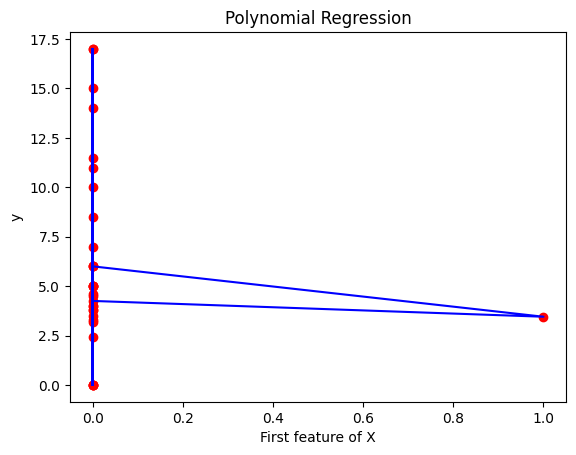

In [ ]:
plt.scatter(X[:,0], y, color='red')
plt.plot(X[:,0], lr2.predict(X_poly), color='blue')
plt.title('Polynomial Regression')
plt.xlabel('First feature of X')
plt.ylabel('y')
plt.show()

In [ ]:
# CALCULATING EVALUATION METRICS
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Predict the target variable using the model
y_pred = lr2.predict(X_poly)

# Compute Mean Squared Error
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

# Compute R-squared
r2 = r2_score(y, y_pred)
print("R-squared:", r2)

Mean Squared Error: 6.100550423640138e-26
R-squared: 1.0


## Support Vector Regression

In [ ]:
from sklearn.svm import SVR

model = SVR(kernel="linear")
model.fit(X,y)

NameError: name 'X' is not defined

## Decision Tree Regression

### Model Training

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor(random_state = 0)
decision_tree_regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

### Model Visualizing

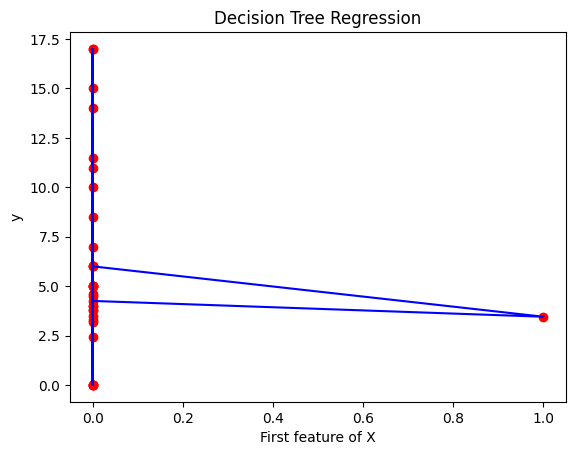

In [ ]:
plt.scatter(X[:,0], y, color='red')
plt.plot(X[:,0], decision_tree_regressor.predict(X), color='blue')
plt.title('Decision Tree Regression')
plt.xlabel('First feature of X')
plt.ylabel('y')
plt.show()

In [ ]:
# CALCULATING EVALUATION METRICS
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 6.128571428571428
Mean Squared Error (MSE): 70.12142857142858
Root Mean Squared Error (RMSE): 8.373853866137656
R-squared (R2): -2.615875989223775


## Random Forest Regression

# Evaluation